In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import *

In [2]:
x = np.random.normal(0,1,100).reshape(-1,1)
y = np.random.normal(0,1,100).reshape(-1,1)
z = np.random.normal(0,1,100).reshape(-1,1)
Data = np.concatenate((x,y,z), axis=1)

x = np.random.normal(0,1,100).reshape(-1,1)
y = np.random.normal(5,1,100).reshape(-1,1)
z = np.random.normal(0,1,100).reshape(-1,1)
newDat = np.concatenate((x,y,z), axis=1)
Data = np.concatenate((Data,newDat))

x = np.random.normal(5,1,100).reshape(-1,1)
y = np.random.normal(-5,1,100).reshape(-1,1)
z = np.random.normal(0,1,100).reshape(-1,1)
newDat = np.concatenate((x,y,z), axis=1)
Data = np.concatenate((Data,newDat))

x = np.random.normal(0,1,100).reshape(-1,1)
y = np.random.normal(0,1,100).reshape(-1,1)
z = np.random.normal(5,1,100).reshape(-1,1)
newDat = np.concatenate((x,y,z), axis=1)
Data = np.concatenate((Data,newDat))
print(Data.shape)

(400, 3)


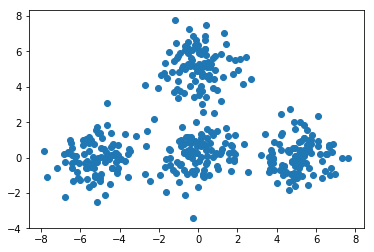

In [3]:
plt.scatter(Data[:,1], Data[:,2])

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(Data)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 8.77358673e-02  5.11712364e+00  1.13115932e-01]
 [ 1.08830945e-01  3.49842942e-03  5.18003085e+00]
 [ 4.88865883e+00 -5.14826957e+00 -2.55101854e-02]
 [-5.01183452e-02  2.73188325e-02  2.12903373e-01]]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

## Neuralising K-Means

We neuralise the clustering classifier with respect to class 0, i.e. write a net that should tell us whether an instance belongs to class 0 or not.

In [5]:
x = np.random.normal(0,1,3)

print(x)
mu_c = kmeans.cluster_centers_[0]
mu = kmeans.cluster_centers_
w = 2*(mu_c - mu)
print("w",w)
print("w2",w[2])
b = (mu**2.).sum(1) - (mu_c**2).sum()
print("b",b)
h = w.dot(x) + b
print(h)

f_c = min(h) # h_c always exact 0
print(f_c >= 0)

[-0.37882745 -1.04202948 -0.03417286]
w [[  0.           0.           0.        ]
 [ -0.04219015  10.22725043 -10.13382984]
 [ -9.60184593  20.53078643   0.27725223]
 [  0.27570842  10.17960962  -0.19957488]]
w2 [-9.60184593 20.53078643  0.27725223]
b [  0.           0.63912886  24.19886839 -26.15686116]
[  0.          -9.6556829    6.43315197 -36.86194038]
False


In [6]:
# Now an example that should hit cluster 0

x = np.random.normal(0,0.01,3)
x[1] +=5.
print(x)
mu_c = kmeans.cluster_centers_[0]
mu = kmeans.cluster_centers_
w = 2*(mu_c - mu)  # Correct in Supplements, wrong in paper!
print("w",w)
print("w2",w[2])
b = (mu**2.).sum(1) - (mu_c**2).sum()
print("b",b)
h = w.dot(x) + b
print("h",h)

f_c = min(h) # h_c always exact 0
print(f_c >= 0)

[-1.19942211e-02  4.99012810e+00 -3.58899443e-03]
w [[  0.           0.           0.        ]
 [ -0.04219015  10.22725043 -10.13382984]
 [ -9.60184593  20.53078643   0.27725223]
 [  0.27570842  10.17960962  -0.19957488]]
w2 [-9.60184593 20.53078643  0.27725223]
b [  0.           0.63912886  24.19886839 -26.15686116]
h [  0.          51.71129487 126.76429421  24.63810419]
True


In [7]:
def layer1(x, centroids, i):
    # takes one instance x, centroid-matrix and index of ith centroid
    # returns values for the distances to centroid i
    mu_c = centroids[i]
    w = 2*(mu_c - mu) # Correct in Supplements, wrong in paper
    b = (mu**2.).sum(1) - (mu_c**2.).sum()
    h = w.dot(x) + b
    return(h)

layer1(x, kmeans.cluster_centers_, 0)
    

array([  0.        ,  51.71129487, 126.76429421,  24.63810419])

In [8]:
def layer2(h):
    return(min(h) >= 0)

for i in range(4):
    print(layer2(layer1(x, 
                   kmeans.cluster_centers_,
                   i)))

True
False
False
False


## Testing this 2-Layer-NN

In [9]:
X = np.random.multivariate_normal(np.ones(3)*2.5, 
                              np.eye(3), 
                              size=1000)
Cluster_Pred = kmeans.predict(X)

In [10]:
# Now predict via the layers
Layer_Pred = np.empty(1000)



for i in range(1000):
    for j in range(4):
        if layer2(layer1(X[i,:],kmeans.cluster_centers_,j)):
            Layer_Pred[i] = range(4)[j]


In [11]:
sum(Layer_Pred != Cluster_Pred)
# Very good! The numerics don't introduce any unexpected errors!

0